In [48]:
#Import the necessary libraries if you are starting a new notebook.
#Load the continuous and discrete variables into continuous_df and discrete_df variables.
#Plot a correlation matrix, what can you see?
#Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
#What can you see in the plots?
#Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
#Have you found outliers? If you have, what should we do with them?


In [2]:
#Import the necessary libraries if you are starting a new notebook.

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
#Load the continuous and discrete variables into continuous_df and discrete_df variables.

numerical_data = customer_df.select_dtypes(np.number)

In [6]:
discrete_data = [i for i in numerical_data if (len(numerical_data[i].unique()) < (numerical_data.shape[0] * 0.01))]

continuous_df = numerical_data.drop(columns = discrete_data)
continuous_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [7]:
discrete_df = numerical_data[discrete_data]
discrete_df.head()

,Months Since Last Claim,Number of Open Complaints,Number of Policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


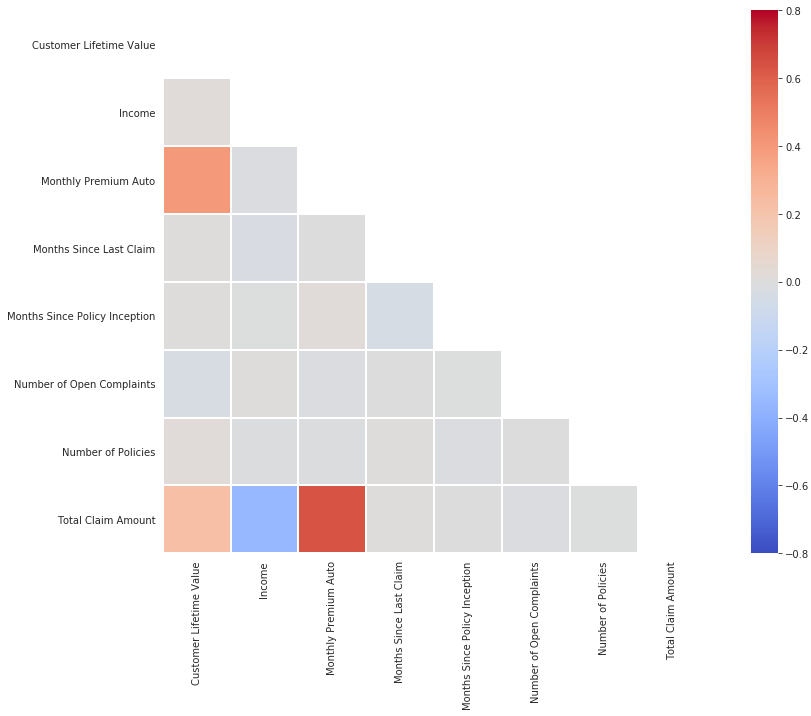

In [8]:
# Plot a correlation matrix, what can you see?

mask = np.zeros_like(numerical_data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numerical_data.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

In [9]:
#Create a function to plot every discrete variables. 
# Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
    plt.show()
        



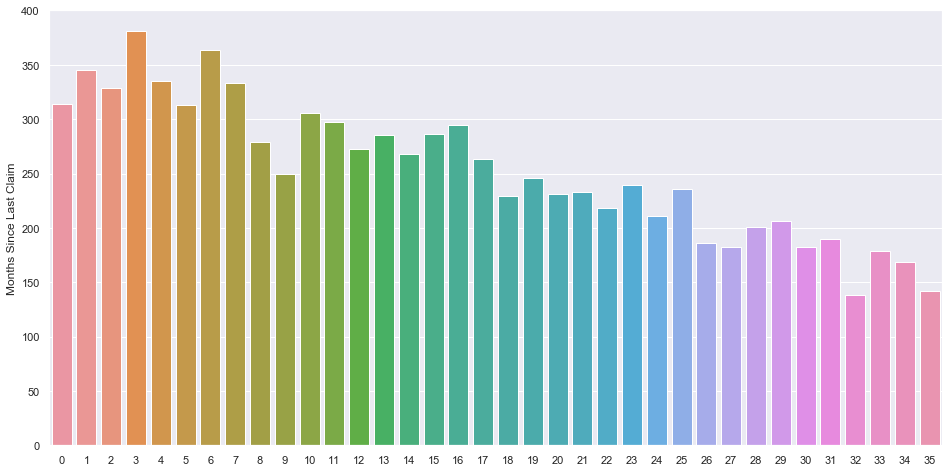

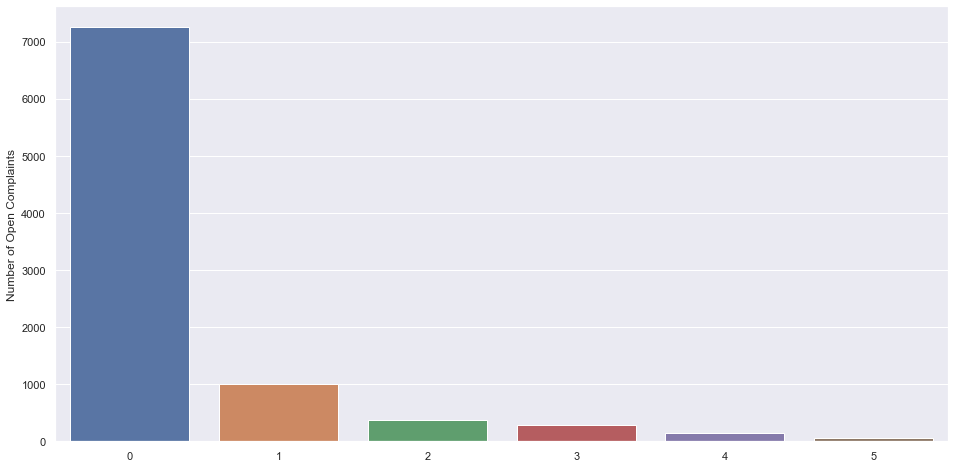

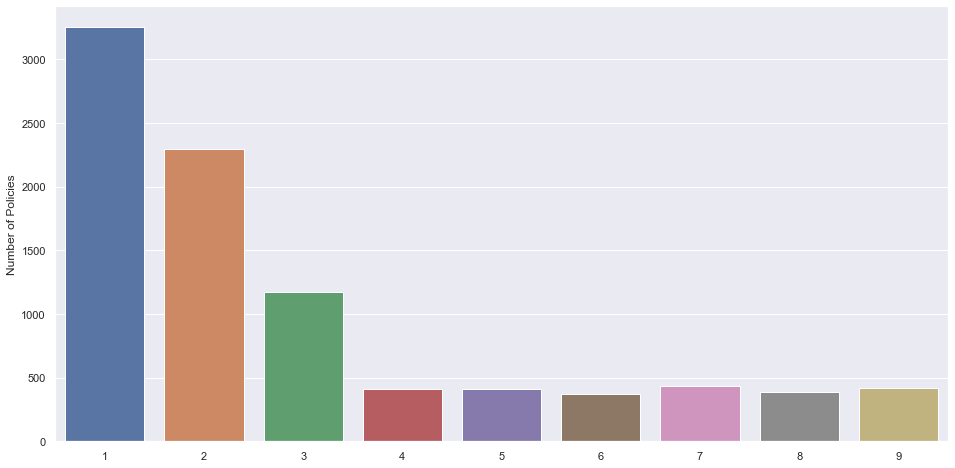

In [10]:
df_bar(discrete_df)


In [11]:
from matplotlib.colors import BASE_COLORS

def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
    plt.show()

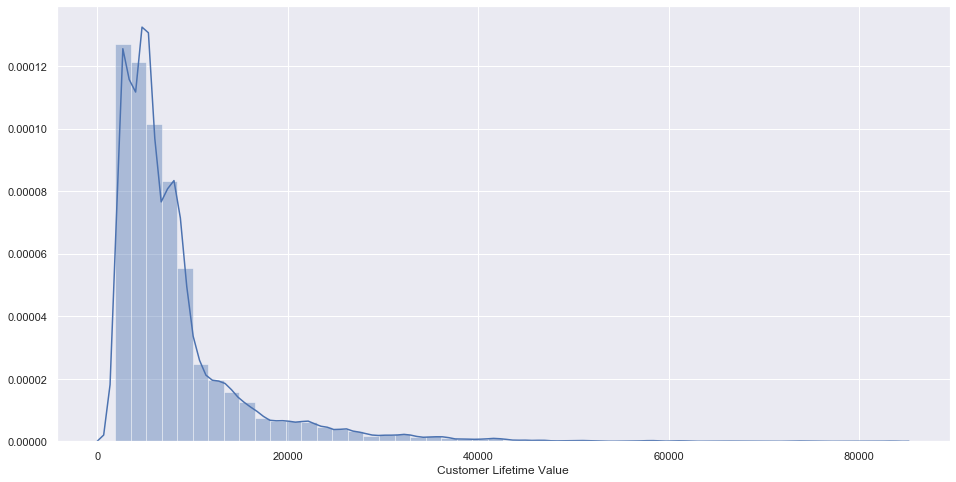

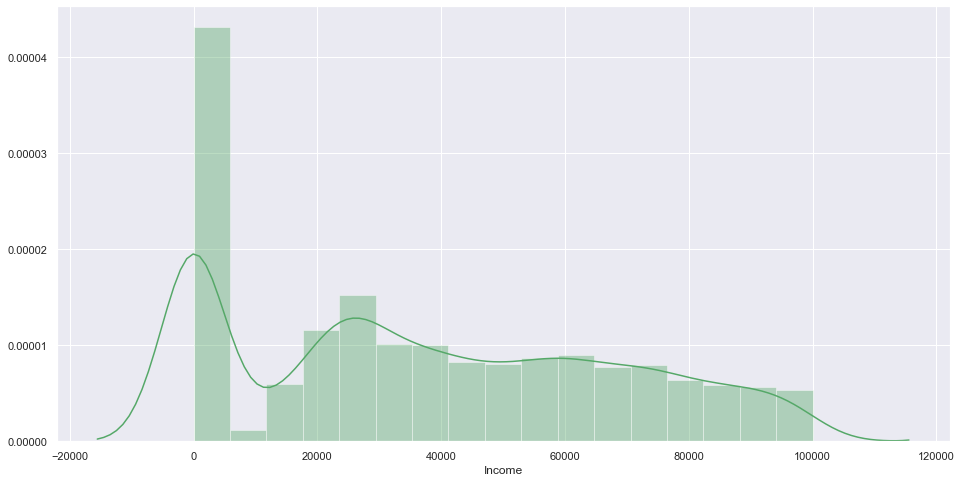

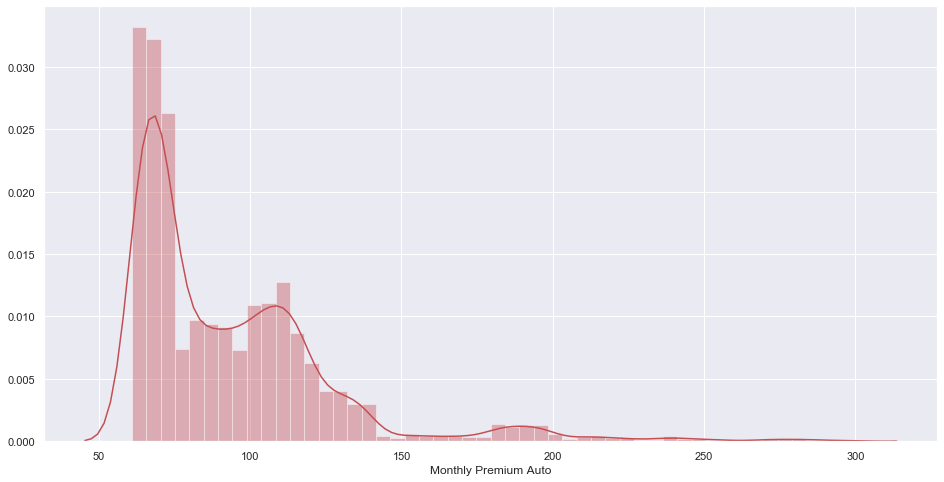

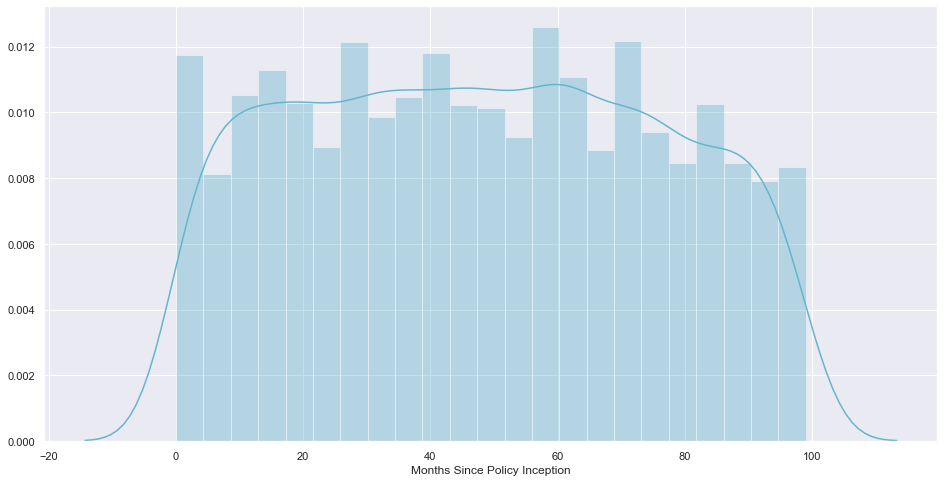

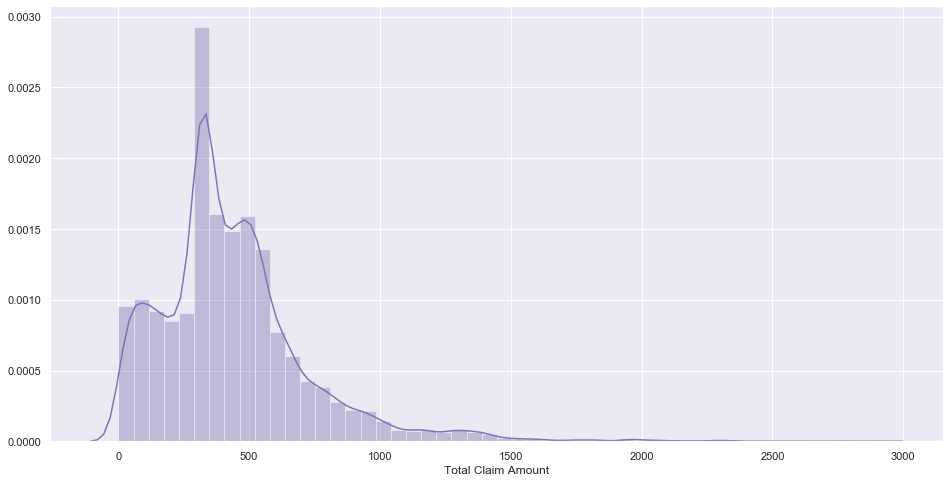

In [12]:
df_hist(continuous_df)

In [13]:
# Look for outliers in the continuous variables we have found. 
# Hint: There was a good plot to do that.


IndexError: index 3 is out of bounds for axis 0 with size 3

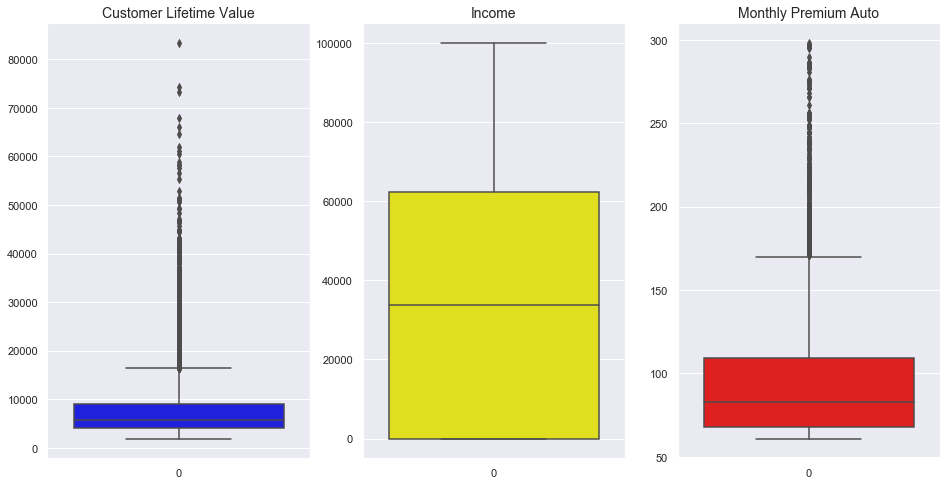

In [15]:

box_colors = ["blue", "yellow", "red"]

f, ax = plt.subplots(1, 3, figsize=(16,8))


for i, col in enumerate(continuous_df[:3]):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();

In [ ]:
# Have you found outliers? 
# We can see that there are many ouiliers in customer_lifetime_value and monthly_premium_auto


In [ ]:
# We drop Customer ID since it is irrelevant for our analysis

customer_df = customer_df.drop(['Customer'], axis = 1)
